# Load and preprocess dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
import os

In [3]:
data = pd.read_csv('original_data.csv', sep=';')
print(data.shape)
data.head()

(7200, 24)


,Row,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,...,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20,Unnamed: 22,Unnamed: 23
0,0,"0,750000",1,0,1,1,1,1,1,0,...,1,1,1,"0,001132","0,080780","0,197324","0,300926","0,225000",NaN,NaN
1,1,"0,239583",1,1,1,1,1,1,1,1,...,1,1,1,"0,000472","0,164345","0,235786","0,537037","0,165625",NaN,NaN
2,2,"0,479167",1,1,1,1,1,1,1,1,...,1,1,1,"0,003585","0,130919","0,167224","0,527778","0,118750",NaN,NaN
3,3,"0,656250",0,1,1,1,1,1,1,1,...,1,1,1,"0,001698","0,091922","0,125418","0,337963","0,129688",NaN,NaN
4,4,"0,229167",1,1,1,1,1,1,1,1,...,1,1,1,"0,000472","0,142061","0,229097","0,337963","0,235938",NaN,NaN


Columns `'Row'`, `'Unnamed: 22'` and `'Unnamed: 23'` are removed from the dataframe since they are empty columns imported from the original csv file 

In [4]:
data.drop(['Row', 'Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True)
data.dtypes

Dim_0       object
Dim_1=0      int64
Dim_2=0      int64
Dim_3=0      int64
Dim_4=0      int64
Dim_5=0      int64
Dim_6=0      int64
Dim_7=0      int64
Dim_8=0      int64
Dim_9=0      int64
Dim_10=0     int64
Dim_11=0     int64
Dim_12=0     int64
Dim_13=0     int64
Dim_14=0     int64
Dim_15=0     int64
Dim_16      object
Dim_17      object
Dim_18      object
Dim_19      object
Dim_20      object
dtype: object

## Checking missing values

In [5]:
data.isna().any().sum()

0

## Handle correctly column types
In order to apply the operators correctly on the data, these need to be represented using the correct data type. The following cell is responsible to convert each column into the correct type to represent the data inside the columns

In [6]:
float_columns = ["Dim_0", "Dim_16", "Dim_17", "Dim_18", "Dim_19", "Dim_20"]
categorical_columns = data.columns[~data.columns.isin(float_columns)]

data[float_columns] = data[float_columns].replace(',', '.', regex=True).astype(float)
data[categorical_columns] = data[categorical_columns].astype('object')

#data = data.convert_dtypes(infer_objects=True)
data.dtypes

Dim_0       float64
Dim_1=0      object
Dim_2=0      object
Dim_3=0      object
Dim_4=0      object
Dim_5=0      object
Dim_6=0      object
Dim_7=0      object
Dim_8=0      object
Dim_9=0      object
Dim_10=0     object
Dim_11=0     object
Dim_12=0     object
Dim_13=0     object
Dim_14=0     object
Dim_15=0     object
Dim_16      float64
Dim_17      float64
Dim_18      float64
Dim_19      float64
Dim_20      float64
dtype: object

In [7]:
data.describe()

,Dim_0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.531790,0.009172,0.108506,0.179649,0.374250,0.173773
std,0.197156,0.043357,0.042001,0.060148,0.088354,0.056402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.001340,0.091922,0.145485,0.324074,0.145312
50%,0.562500,0.003208,0.109192,0.175585,0.370370,0.170313
75%,0.687500,0.005094,0.119777,0.205686,0.402778,0.195313
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scale data

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Create a scaler object
scaler = StandardScaler()

data_std = data.copy()

# Fit the scaler and transform the float columns
data_std[float_columns] = scaler.fit_transform(data[float_columns])
data_std.describe()

,Dim_0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
count,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03
mean,8.684411e-17,-5.921189e-18,2.111891e-16,-8.092292e-17,-2.289527e-16,-3.157968e-16
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-2.697497e+00,-2.115708e-01,-2.583596e+00,-2.986986e+00,-4.236078e+00,-3.081162e+00
25%,-7.953142e-01,-1.806625e-01,-3.948692e-01,-5.680383e-01,-5.679310e-01,-5.046416e-01
50%,1.557775e-01,-1.375755e-01,1.634148e-02,-6.757202e-02,-4.391320e-02,-6.134996e-02
75%,7.898385e-01,-9.407336e-02,2.683777e-01,4.329109e-01,3.229083e-01,3.819239e-01
max,2.374991e+00,2.285427e+01,2.122710e+01,1.363980e+01,7.082778e+00,1.464979e+01


In [9]:
data_std.head()

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
0,1.106869,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,-0.185460,-0.660168,0.293878,-0.829940,0.908303
1,-1.482215,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-0.200684,1.329573,0.933377,1.842567,-0.144473
2,-0.266928,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-0.128880,0.533676,-0.206589,1.737765,-0.975611
3,0.631323,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-0.172405,-0.394869,-0.901688,-0.410723,-0.781670
4,-1.535050,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-0.200684,0.798975,0.822161,-0.410723,1.102244


## Compute Gower Distance matrix

**Gower Distance**

Gower Distance between 2 observations $ i $ e $ j $ is defined as the weighted mean of the individual dissimilarities between each feature. The general formula is:

$$ d_{i,j} = \frac{ \sum_{k=1}^{p} w_k \cdot \delta_k(x_{ik}, x_{jk}) }{ \sum_{k=1}^p w_k } $$

where:
- $ p $ is the number of features,
- $ w_k $ is the weight of the $ k $-th feature,
- $ \delta_k(x_{ik}, x_{jk}) $ is the dissimilarity between the $ k $-th feature values of observations $ i $ and $ j $.

*Numerical Variables*

For numerical variables, the dissimilarity $ \delta_k(x_{ik}, x_{jk}) $ is calculated using the absolute difference between the normalized values of the feature:

$$ \delta_k(x_{ik}, x_{jk}) = \frac{|x_{ik} - x_{jk}|}{\max(x_k) - \min(x_k)} $$ 

where:
- $ x_{ik} $ and $ x_{jk} $ are the values of the $ k $-th feature for observations $ i $ and $ j $,
- $ \max(x_k) $ and $ \min(x_k) $ are the maximum and minimum values of the $ k $-th feature across all observations.

Normalization ensures that the dissimilarity values for numerical features are scaled to lie between 0 and 1, making them comparable with categorical features.

*Categorical Variables*

For categorical variables, the dissimilarity $ \delta_k(x_{ik}, x_{jk}) $ is calculated using a simple matching approach:

   $$
   \delta_k(x_{ik}, x_{jk}) = \begin{cases}
   0 & \text{if } x_{ik} = x_{jk} \\
   1 & \text{if } x_{ik} \ne x_{jk}
   \end{cases}
   $$

where:
- $ x_{ik} $ and $ x_{jk} $ are the values of the $ k $-th feature for observations $ i $ and $ j $.

In [10]:
import gower
import pickle

# Check if the gower_dist object has already been computed and saved
try:
    # Try to load the gower_dist object from a file
    with open('gower_dist.pkl', 'rb') as file:
        gower_dist = pickle.load(file)
    print("Loaded gower_dist object from file.")
except FileNotFoundError:
    # If the file does not exist, initialize and compute the gower_dist object
    print("File not found. Computing gower_dist object.")
    gower_dist = gower.gower_matrix(data_std.values)

    # Save the gower_dist object to a file for future use
    with open('gower_dist.pkl', 'wb') as file:
        pickle.dump(gower_dist, file)
    print("Saved gower_dist object to file.")

Loaded gower_dist object from file.


DISCLAIMER: unfortunately, due to the size of the file storing the proximity distance calculated using gower distance, we were unable to attach it to the archive when delivering the project

# Exploring the data 
Firstly, we explore the data by calculating the proximity distance between each pair of observation. To do that we employ the use of the function pdist from scipy.spatial.distance, using as distance function the euclidean distance

In [11]:
from scipy.spatial.distance import squareform
PM_gower = squareform(gower_dist).round(2)

In [13]:
gower_dist.shape

(7200, 7200)

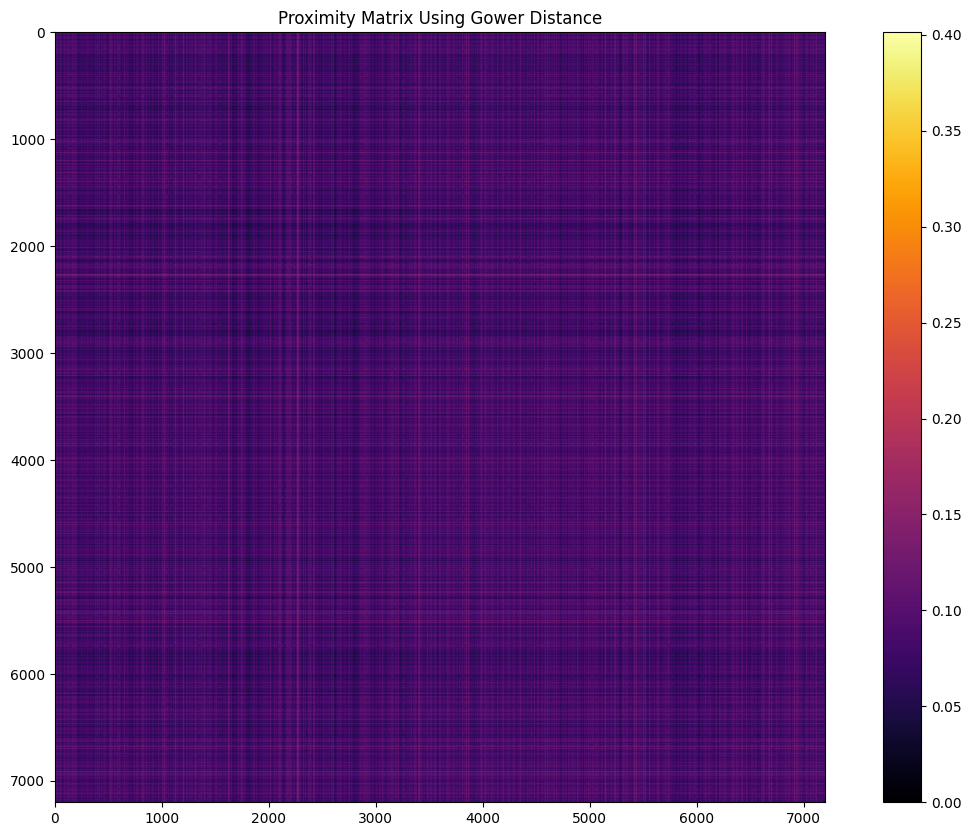

In [14]:
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=gower_dist.max())
plt.figure(figsize=(15, 10))
plt.imshow(gower_dist, cmap='inferno', norm=norm)
plt.grid(False)
plt.colorbar()
plt.title("Proximity Matrix Using Gower Distance") 
plt.show() 

The more an horizontal (or vertical line) is bright, the more that element is distant from all the other, which can also correspond to an anomaly

# Dimensionality reduction

## PCA: Why it cannot be used 

We decided not to use Principal Component Analysis (PCA) for anomaly detection and dimensionality reduction because of its intrinsic methodology.

PCA works by converting the original dataset into a series of linearly uncorrelated components, sorted by the variance they account for. This involves calculating the covariance matrix and determining eigenvalues and eigenvectors, which require numerical data. **Concepts such as covariance, eigenvalues, and eigenvectors are not directly applicable to categorical data.**

**PCA is not suitable for our needs** as it cannot properly handle the categorical features of our mixed data types dataset.

## FAMD

To overcome the limitations of PCA, we employed **Factor Analysis of Mixed Data (FAMD)** as a dimensionality reduction technique. 

FAMD is a variant of PCA that can handle mixed data types, including categorical and continuous variables, making it particularly useful for our dataset. However, in this study, we did not use FAMD for anomaly detection because the original features cannot be straightforwardly reconstructed from the FAMD coordinates.

Instead, **we used FAMD to reduce the dimensionality of the data** and identify the most informative features that capture the underlying structure of the dataset. This enables us to visualize the data in a lower-dimensional space and to plot the clustering results of the algorithms discussed in the following sections.

In [26]:
import prince

famd = prince.FAMD(n_components=3, n_iter=100,
                   copy=True, check_input=True,
                   engine='sklearn', random_state=42)

famd = famd.fit(data)
    
famd_coords = famd.row_coordinates(data)
print(famd_coords.shape)
famd_coords.head()

(7200, 3)


c:\Users\Andrea\AppData\Local\Programs\Python\Python311\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.7180703308172536, -2.6427968139832467, -0.3078825533651861, -2.7212512440664742, -0.2479079130107253, -2.72736900082601, -0.4377975178854566, -2.70339292988151, -0.032274861218395144, -2.7384225994782714, -0.6055300708194984, -2.6708300832013507, -1.510725543130408, -2.2842303590779394, -0.9895285072531598, -2.553592241007427, -0.3400367627183861, -2.717420652015437, -0.30956959368344517, -2.7210598425368504, -0.5361902647381803, -2.685609800399157, -0.2850438562747845, -2.72373823999297, -0.3243583409338094, -2.7193366225362148, -0.3550234734023466, -2.7155033296487288, -0.7011894655987544, -2.647325694608303]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy())
c:\Users\Andrea\AppData\Local\Programs\Python\Python311\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concate

component,0,1,2
0,-7.333364,-9.373418,-1.192621
1,-0.450192,0.520658,-0.052591
2,-0.281327,0.388269,-0.009065
3,3.069651,0.255190,-0.051957
4,-0.270797,0.341807,-0.037444


In [27]:
import seaborn as sns
import pandas as pd

# Handy function used every time it's necessary to visualize the result of
# an anomaly detection algorithm 
def plot_all_components(coords, labels, title=''):
    # Ensure coords is a DataFrame
    if not isinstance(coords, pd.DataFrame):
        coords = pd.DataFrame(coords)

    # Add labels to the DataFrame
    coords['label'] = labels

    orange = '#fb8500'
    blue = '#0077b6'

    # Create a pairplot of all components
    if labels[0] == 'Anomaly':
        palette = [orange, blue]
    else:
        palette = [blue, orange]
    fig = sns.pairplot(coords, hue='label', palette=palette)
    fig.fig.suptitle(title, y=1.02)
    return fig

# Hierarchical clustering

## Average Linkage Method

### Compute the hierarchical clustering 

In [19]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

# Convert the gower_dist matrix to a condensed form (one-dimensional array)
# in order to compute hierarchical clustering with linkage function
gower_dist_vector = squareform(gower_dist, force='tovector')

# Perform hierarchical clustering using the 
# 'average' method on the condensed distance matrix.
# The output is a linkage matrix with format [idx1, idx2, dist, sample_count].
linkage_average = linkage(gower_dist_vector, method='average')

# Determine the max height of the dendrogram
max_height = linkage_average[:, 2].max()
print(f'Max height for average method: {max_height:.3f}')

Max height for average method: 0.207


### Plot the Dendrogram

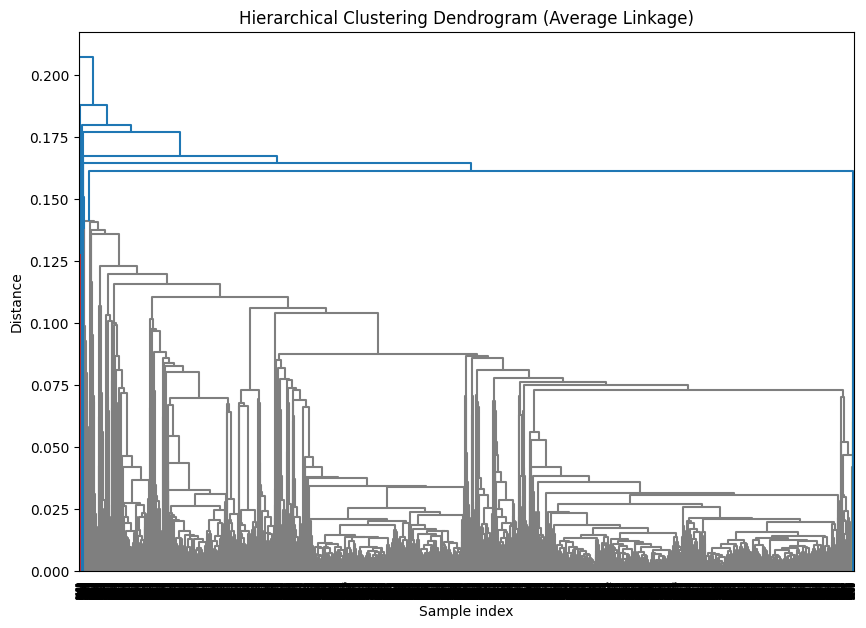

Leaves = 7200


In [21]:
# Plot the dendrogram for the average linkage
dendogram_fig = plt.figure(figsize=(10, 7))
dendrogram_average = dendrogram(linkage_average)
plt.title(f'Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
print(f"Leaves = {len(dendrogram_average['leaves'])}")
#dendogram_fig.savefig(f'images/dendrogram_linkage.png', dpi=300)

### Determining the best distance 

To find the best distance, we iterate 100 times from 0.001 to the maximum height of the dendrogram to perform hierarchical clustering and then compute the Silhouette score for each threshold.

**The best distance is the one with the highest Silhouette score.**

In [24]:
from tqdm.auto import tqdm

# Create a linear range of 100 iterations from 0.001 to max_height
thresholds = np.linspace(0.001, max_height, 100)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over the range of thresholds
for threshold in tqdm(thresholds):
    # Extract cluster labels at the current threshold
    clusters = fcluster(linkage_average, threshold, criterion='distance')
    
    if len(np.unique(clusters)) > 1:
        # Calculate the silhouette score
        score = silhouette_score(gower_dist, clusters, metric='precomputed')
    else:
        # If only one cluster was found
        score = -np.inf

    # Save the silhouette score for plotting
    silhouette_scores.append(score)

# Find the distance with the highest silhouette score
best_threshold_idx = np.argmax(silhouette_scores)
best_threshold = thresholds[best_threshold_idx]
print(f'Optimal Threshold: {best_threshold:.3f} with Silhouette Score: {silhouette_scores[best_threshold_idx]:.3f}')

100%|██████████| 100/100 [00:25<00:00,  3.96it/s]

Optimal Threshold: 0.065 with Silhouette Score: 0.649


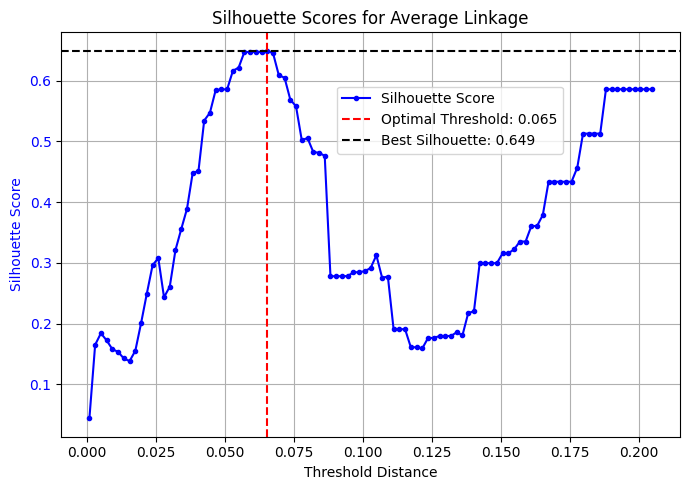

In [25]:
# Plot silhouette scores
fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot silhouette scores on the left y-axis
ax1.plot(thresholds, silhouette_scores, marker='.', color='b', label='Silhouette Score')
ax1.set_xlabel('Threshold Distance')
ax1.set_ylabel('Silhouette Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(x=best_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold:.3f}')
ax1.axhline(y=silhouette_scores[best_threshold_idx], color='k', linestyle='--', 
            label=f'Best Silhouette: {silhouette_scores[best_threshold_idx]:.3f}')

# Add a title and show the plot
plt.title('Silhouette Scores for Average Linkage')
fig.tight_layout()
fig.legend(loc='center', bbox_to_anchor=(0.65, 0.75))
plt.grid()
plt.show()

# Save the plot
#fig.savefig(f'images/silhouette_score_average_linkage.png', dpi=300)

### Identify anomalies

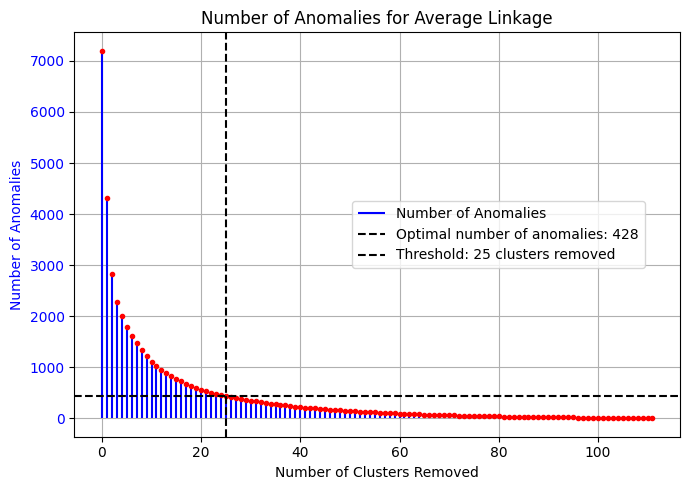

In [26]:
# Extract cluster labels and sort them by frequency
clusters = fcluster(linkage_average, best_threshold, criterion='distance')
unique, counts = np.unique(clusters, return_counts=True)
sorted_clusters = sorted(zip(unique, counts), key=lambda x: x[1], reverse=True)

# Compute the number of anomalies for each cluster removal
counts = sorted(counts, reverse=True)
anomalies = []
for c in range(len(counts)):
    anomalies.append(sum(counts[c:]))

# Plot the number of anomalies
fig_anomalies_average, ax1 = plt.subplots(figsize=(7, 5))

threshold = 25

# Use vlines for the number of anomalies
ax1.vlines(x=np.arange(len(anomalies)), ymin=0, ymax=anomalies, color='b', label='Number of Anomalies')
ax1.plot(np.arange(len(anomalies)), anomalies, 'r.')
ax1.set_xlabel('Number of Clusters Removed')
ax1.set_ylabel('Number of Anomalies', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axhline(y=sum(counts[threshold:]), color='k', linestyle='--', 
            label=f'Optimal number of anomalies: {sum(counts[threshold:])}')
ax1.axvline(x=threshold, color='k', linestyle='--', 
            label=f'Threshold: {threshold} clusters removed')
ax1.grid(True)
ax1.legend(loc='center', bbox_to_anchor=(0.7, 0.5))

plt.title('Number of Anomalies for Average Linkage')
fig_anomalies_average.tight_layout()
plt.show()
#fig_anomalies_average.savefig('images/anomalies_average_linkage.png', dpi=300)

The optimal number of clusters to remove was determined visually by choosing a **threshold after which change to the number of anomalies became insignificant.**

We opted to remove the **25 largest clusters**, leading to 428 anomalies.

### Computing the probability of an element of being an anomaly

**Probability computation**

Next, we calculated the probability of each data point being an anomaly using an approach based on the threshold of number of clusters to remove. The increment in probability is computed as follows:

$$
p_{\text{anomaly}}^{(i)} = 
\begin{cases}
    0 & \text{if i=0} \\
    \frac{0.5}{n_{\text{before}}} + p_{\text{anomaly}}^{(i-1)} & \text{if i < threshold} \\
    0.5 & \text{if i = threshold} \\
    \frac{0.5}{n_{\text{after}}} + p_{\text{anomaly}}^{(i-1)}  & \text{if i > threshold} \\
\end{cases}$$
Where:
* $n_{\text{before}}$ is the number of clusters before the specificied threshold
* $n_{\text{after}}$ is the number of cluster after the specified treshold

Each cluster was assigned a probability based on this approach, and each data point inherited the probability of its corresponding cluster. This method enabled a smooth transition in the anomaly probabilities.

In [27]:
# Calculate probabilities
incr_prob_before_thresh = 0.5 / threshold
incr_prob_after_thresh = 0.5 / (len(sorted_clusters) - threshold)

# Dictionary to hold the probability of each cluster
cluster_probabilities = {}
cum_prob = 0

# Assign probabilities to clusters
for i, (cluster, size) in enumerate(sorted_clusters):
    if i+1 == threshold:
        cum_prob = 0.5
        incr = incr_prob_after_thresh
    else:
        incr = incr_prob_before_thresh if i < threshold else incr_prob_after_thresh

    cluster_probabilities[cluster] = cum_prob
    cum_prob += incr

# Assign the probabilities of each cluster to its respective data points
hc_average_prob = np.array([cluster_probabilities[cluster] for cluster in clusters])

# Count number of outliers
sum(hc_average_prob.round())

428.0

### Clustering visualization using FAMD

Here we change the labels for better visualization and employ FAMD to visualize the hierarchical clustering performed with average linkage using the coordinates of the FAMD.

In [28]:
prob_labels_average = hc_average_prob.round().astype(str)
prob_labels_average[prob_labels_average == '1.0'] = 'Anomaly'
prob_labels_average[prob_labels_average == '0.0'] = 'Data'

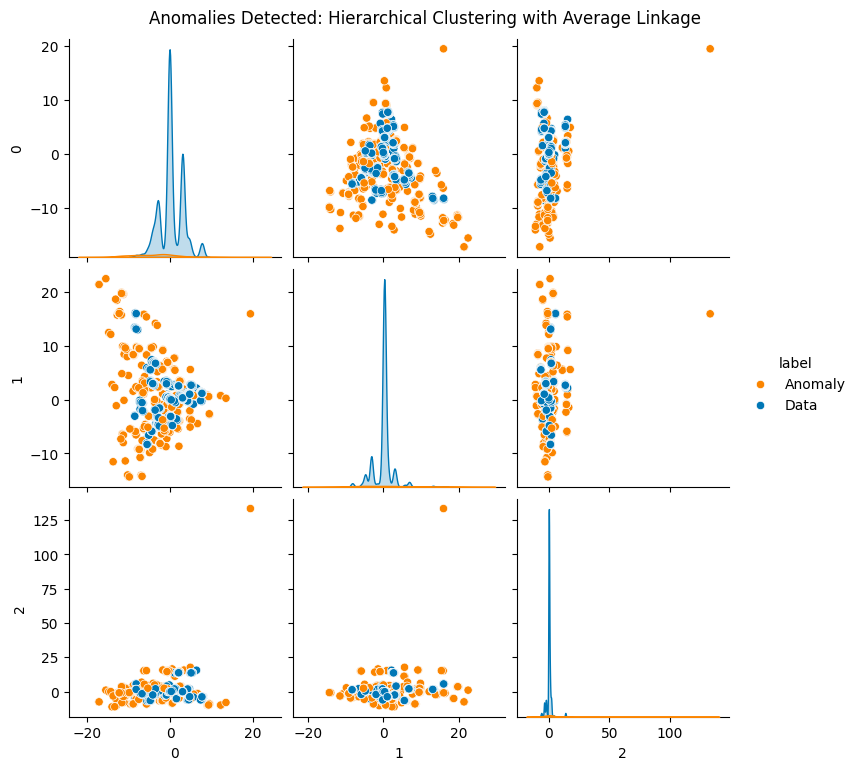

In [30]:
famd_hierarchical_average_fig = plot_all_components(famd_coords, prob_labels_average,
                                                    title='Anomalies Detected: Hierarchical Clustering with Average Linkage')
#famd_hierarchical_average_fig.savefig('images/famd_hierarchical_average_fig.png', dpi=300)

## Complete Linkage Method

### Compute the hierarchical clustering

In [31]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

# Convert the gower_dist matrix to a condensed form (one-dimensional array)
# in order to compute hierarchical clustering with linkage function
gower_dist_vector = squareform(gower_dist, force='tovector')

# Perform hierarchical clustering using the 
# 'complete' method on the condensed distance matrix.
# The output is a linkage matrix with format [idx1, idx2, dist, sample_count].
linkage_complete = linkage(gower_dist_vector, method='complete')

# Determine the max height of the dendrogram
max_height = linkage_complete[:, 2].max()
print(f'Max height for complete method: {max_height:.3f}')

Max height for complete method: 0.401


### Plot the Dendrogram 

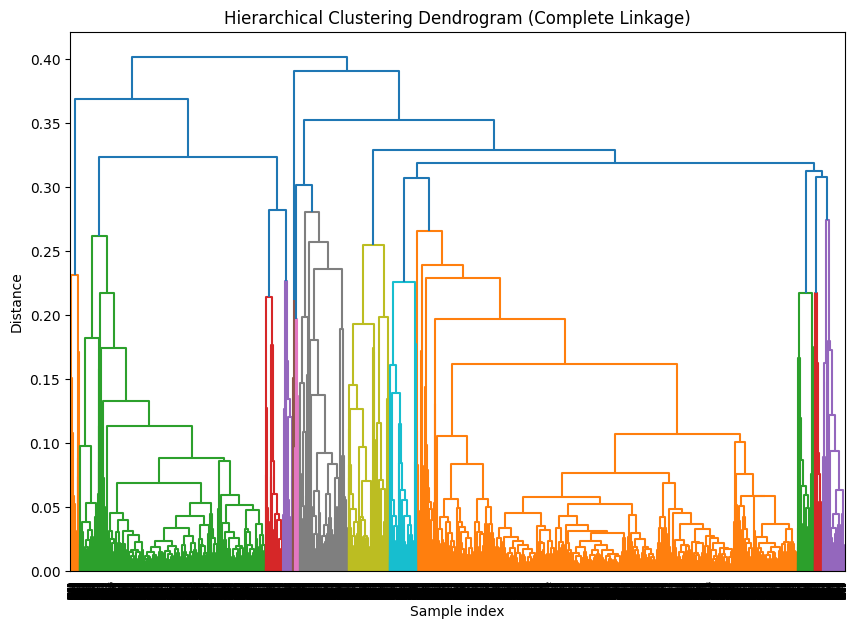

Leaves = 7200


In [32]:
# Plot the dendrogram for the average linkage
dendogram_fig = plt.figure(figsize=(10, 7))
dendrogram_complete = dendrogram(linkage_complete)
plt.title(f'Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
print(f"Leaves = {len(dendrogram_complete['leaves'])}")
#dendogram_fig.savefig(f'images/dendrogram_complete_linkage.png', dpi=300)

### Determining the best distance 

**Determining the best distance**

To find the best distance, we iterate 100 times from 0.001 to the maximum height of the dendrogram to perform hierarchical clustering and then compute the Silhouette score for each threshold.

**The best distance is the one with the highest Silhouette score.**

In [33]:
from tqdm.auto import tqdm

# Create a linear range of 100 iterations from 0.001 to max_height
thresholds = np.linspace(0.001, max_height, 100)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over the range of thresholds
for threshold in tqdm(thresholds):
    # Extract cluster labels at the current threshold
    clusters = fcluster(linkage_complete, threshold, criterion='distance')
    
    if len(np.unique(clusters)) > 1:
        # Calculate the silhouette score
        score = silhouette_score(gower_dist, clusters, metric='precomputed')
    else:
        # If only one cluster was found
        score = -np.inf

    # Save the silhouette score for plotting
    silhouette_scores.append(score)

# Find the distance with the highest silhouette score
best_threshold_idx = np.argmax(silhouette_scores)
best_threshold = thresholds[best_threshold_idx]
print(f'Optimal Threshold: {best_threshold:.3f} with Silhouette Score: {silhouette_scores[best_threshold_idx]:.3f}')

100%|██████████| 100/100 [00:23<00:00,  4.31it/s]

Optimal Threshold: 0.147 with Silhouette Score: 0.519


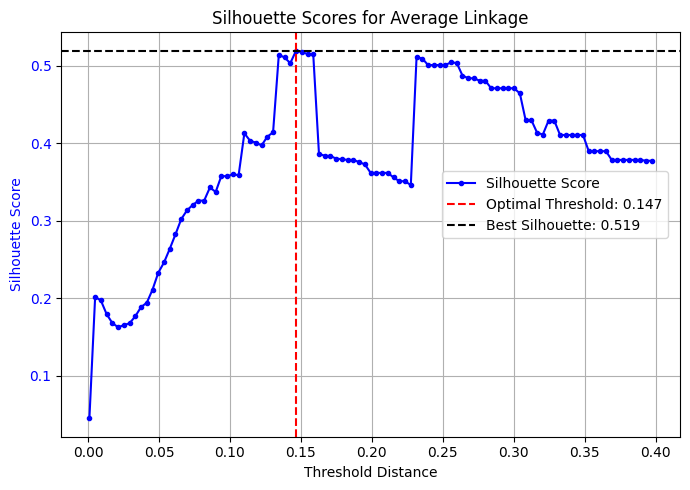

In [34]:
# Plot silhouette scores
fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot silhouette scores on the left y-axis
ax1.plot(thresholds, silhouette_scores, marker='.', color='b', label='Silhouette Score')
ax1.set_xlabel('Threshold Distance')
ax1.set_ylabel('Silhouette Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(x=best_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold:.3f}')
ax1.axhline(y=silhouette_scores[best_threshold_idx], color='k', linestyle='--', 
            label=f'Best Silhouette: {silhouette_scores[best_threshold_idx]:.3f}')

# Add a title and show the plot
plt.title('Silhouette Scores for Average Linkage')
fig.tight_layout()
fig.legend(loc='lower center', bbox_to_anchor=(0.8, 0.5))
plt.grid()
plt.show()

# Save the plot
#fig.savefig(f'images/silhouette_score_complete_linkage.png', dpi=300)

The best threshold distance is the one with the highest Silhouette score: a distance of 0.147 with Silhouette 0.519.

### Identify anomalies

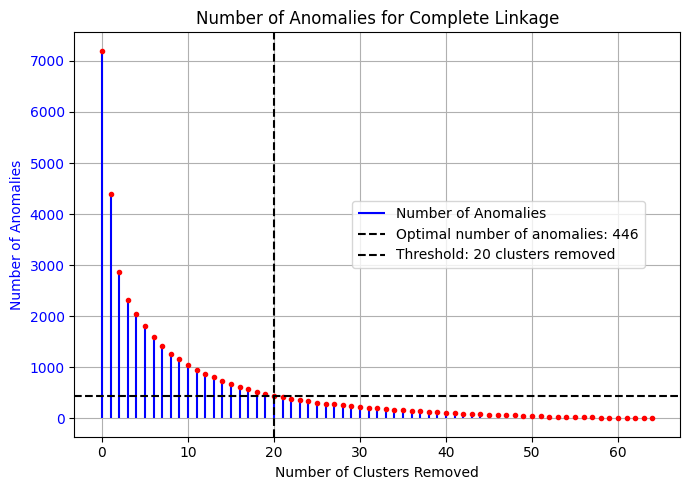

In [35]:
# Extract cluster labels and sort them by frequency
clusters = fcluster(linkage_complete, best_threshold, criterion='distance')
unique, counts = np.unique(clusters, return_counts=True)
sorted_clusters = sorted(zip(unique, counts), key=lambda x: x[1], reverse=True)

# Compute the number of anomalies for each cluster removal
counts = sorted(counts, reverse=True)
anomalies = []
for c in range(len(counts)):
    anomalies.append(sum(counts[c:]))

# Plot the number of anomalies
fig_anomalies_complete, ax1 = plt.subplots(figsize=(7, 5))

threshold = 20

# Use vlines for the number of anomalies
ax1.vlines(x=np.arange(len(anomalies)), ymin=0, ymax=anomalies, color='b', label='Number of Anomalies')
ax1.plot(np.arange(len(anomalies)), anomalies, 'r.')
ax1.set_xlabel('Number of Clusters Removed')
ax1.set_ylabel('Number of Anomalies', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axhline(y=sum(counts[threshold:]), color='k', linestyle='--', 
            label=f'Optimal number of anomalies: {sum(counts[threshold:])}')
ax1.axvline(x=threshold, color='k', linestyle='--', 
            label=f'Threshold: {threshold} clusters removed')
ax1.grid(True)
ax1.legend(loc='center', bbox_to_anchor=(0.7, 0.5))

plt.title('Number of Anomalies for Complete Linkage')
fig_anomalies_complete.tight_layout()
plt.show()
#fig_anomalies_complete.savefig('images/anomalies_complete_linkage.png', dpi=300)

The optimal number of clusters to remove was determined visually by choosing a **threshold after which change to the number of anomalies became insignificant.**

We opted to remove the **20 largest clusters**, leading to 446 anomalies.

### Computing the probability of an element of being an anomaly 

**Probability computation**

Next, we calculated the probability of each data point being an anomaly using an approach based on the threshold of number of clusters to remove. The increment in probability is computed as follows:

$$
p_{\text{anomaly}}^{(i)} = 
\begin{cases}
    0 & \text{if i=0} \\
    \frac{0.5}{n_{\text{before}}} + p_{\text{anomaly}}^{(i-1)} & \text{if i < threshold} \\
    0.5 & \text{if i = threshold} \\
    \frac{0.5}{n_{\text{after}}} + p_{\text{anomaly}}^{(i-1)}  & \text{if i > threshold} \\
\end{cases}$$
Where:
* $n_{\text{before}}$ is the number of clusters before the specificied threshold
* $n_{\text{after}}$ is the number of cluster after the specified treshold

Each cluster was assigned a probability based on this approach, and each data point inherited the probability of its corresponding cluster. This method enabled a smooth transition in the anomaly probabilities.

In [36]:
# Calculate probabilities
incr_prob_before_thresh = 0.5 / threshold
incr_prob_after_thresh = 0.5 / (len(sorted_clusters) - threshold)

# Dictionary to hold the probability of each cluster
cluster_probabilities = {}
cum_prob = 0

# Assign probabilities to clusters
for i, (cluster, size) in enumerate(sorted_clusters):
    if i+1 == threshold:
        cum_prob = 0.5
        incr = incr_prob_after_thresh
    else:
        incr = incr_prob_before_thresh if i < threshold else incr_prob_after_thresh

    cluster_probabilities[cluster] = cum_prob
    cum_prob += incr

# Assign the probabilities of each cluster to its respective data points
hc_complete_prob = np.array([cluster_probabilities[cluster] for cluster in clusters])

# Count number of outliers
sum(hc_complete_prob.round())

446.0

### Clustering visualization using FAMD 

Here we change the labels for better visualization and employ FAMD to visualize the hierarchical clustering performed with average linkage using the coordinates of the FAMD.

In [37]:
prob_labels_complete = hc_complete_prob.round().astype(str)
prob_labels_complete[prob_labels_complete == '1.0'] = 'Anomaly'
prob_labels_complete[prob_labels_complete == '0.0'] = 'Data'

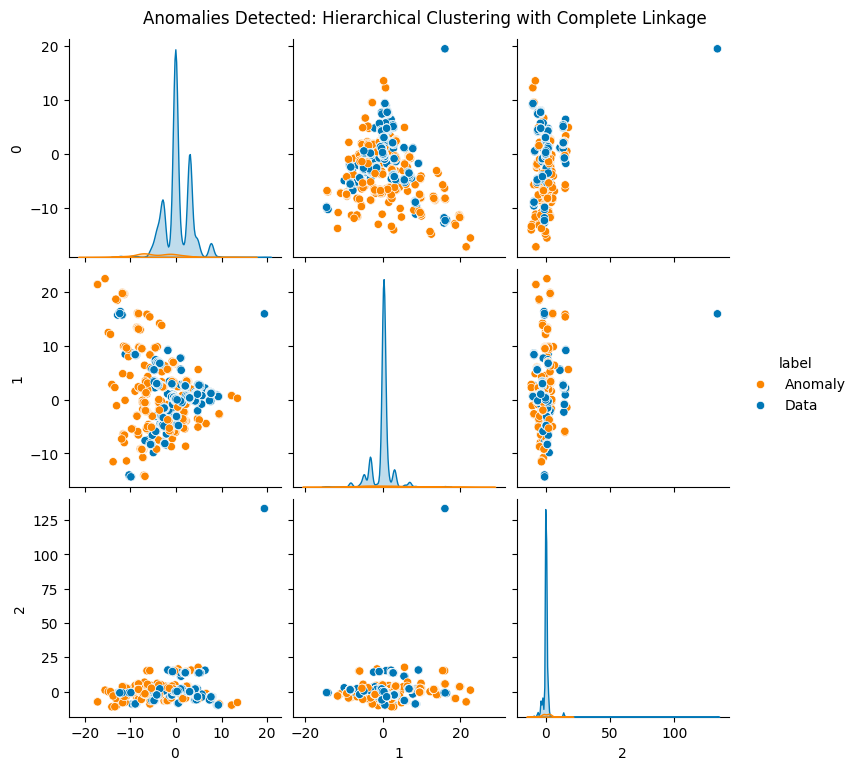

In [38]:
famd_hierarchical_complete_fig = plot_all_components(famd_coords, prob_labels_complete, 
                                                     title='Anomalies Detected: Hierarchical Clustering with Complete Linkage')
#famd_hierarchical_complete_fig.savefig('images/famd_hierarchical_complete_fig.png', dpi=300)

# Distance Based Clustering

## K-Means 

K-Means is a clustering algorithm that partitions data into $K$ clusters by minimizing variance within each cluster. 

It uses the **Euclidean distance** to compute cluster centroids as the mean of assigned points. The Euclidean distance metric does not handle categorical data effectively, leading to inaccurate cluster assignments. Additionally, calculating the mean of categorical variables is meaningless, causing unreliable centroids. **Therefore, K-Means is not appropriate for our dataset of mixed data types.**

Since we're using the **Gower distance as a metric**, we will use:
* **K-Medoids**
* **K-Prototypes**
  
as clustering algorithms which can handle mixed data types dataset and precomputed metrics: the Gower distance in this study.

## K-Medoids

### Determine the optimal number of clusters using Elbow method 

In [12]:
from sklearn_extra.cluster import KMedoids

In [13]:
sse_array_kmedoids = []
iterations=21
for i in range(2, iterations, 1):
    # Fit the kmedoids for i number of cluster
    kmedoids = KMedoids(n_clusters=i, metric='precomputed', init='k-medoids++', method='pam', max_iter=200, random_state=42)
    kmedoids.fit(gower_dist)
    
    # Final SSE is the attribute kmedoids.inertia_
    print(f'{i} Clusters: final SSE is {kmedoids.inertia_:.0f}')
    sse_array_kmedoids.append(kmedoids.inertia_)

2 Clusters: final SSE is 276
3 Clusters: final SSE is 239
4 Clusters: final SSE is 220
5 Clusters: final SSE is 204
6 Clusters: final SSE is 192
7 Clusters: final SSE is 183
8 Clusters: final SSE is 175
9 Clusters: final SSE is 168
10 Clusters: final SSE is 162
11 Clusters: final SSE is 156
12 Clusters: final SSE is 151
13 Clusters: final SSE is 147
14 Clusters: final SSE is 142
15 Clusters: final SSE is 138
16 Clusters: final SSE is 135
17 Clusters: final SSE is 132
18 Clusters: final SSE is 130
19 Clusters: final SSE is 127
20 Clusters: final SSE is 125


Optimal number of clusters: 5.000


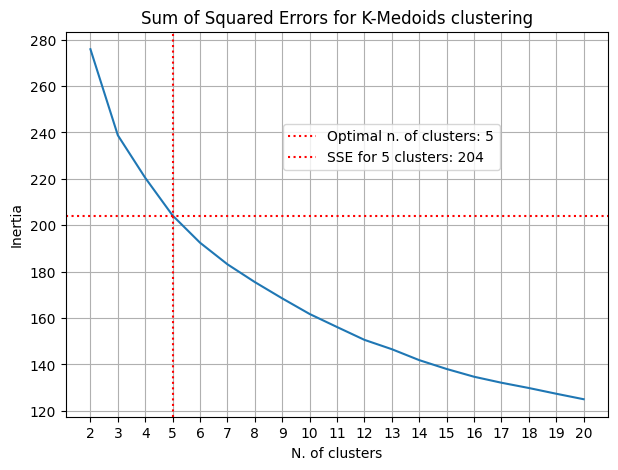

In [16]:
from kneed import KneeLocator

# Get the knee
kneedle = KneeLocator(np.arange(len(sse_array_kmedoids)), sse_array_kmedoids, S=1, curve="convex", direction="decreasing")
optimal_clusters = kneedle.knee
optimal_sse = sse_array_kmedoids[optimal_clusters - 2]
print(f'Optimal number of clusters: {optimal_clusters:.3f}')

sse_kmedoids_fig = plt.figure(figsize=(7, 5))
plt.plot(range(2, iterations, 1), sse_array_kmedoids)
plt.xticks(range(2, iterations, 1))
plt.title('Sum of Squared Errors for K-Medoids clustering')
plt.ylabel("Inertia")
plt.xlabel("N. of clusters")
plt.axvline(x=optimal_clusters, color='r', linestyle='dotted', label=f'Optimal n. of clusters: {optimal_clusters}')
plt.axhline(y=optimal_sse, color='r', linestyle='dotted', label=f'SSE for {optimal_clusters} clusters: {optimal_sse:.0f}')
plt.grid()
plt.legend(loc='center', bbox_to_anchor=(0.6, 0.7))
plt.show()
#sse_kmedoids_fig.savefig('images/sse_kmedoids.png', dpi=300)

**Fit K-Medoids with the optimal number of clusters**
* Compute the Silhouette score
* Get the 5 Medoids indices

In [17]:
kmedoids_optimal = KMedoids(n_clusters=5, metric='precomputed', init='k-medoids++', method='pam', max_iter=300, random_state=42).fit(gower_dist)
silhouette_score(gower_dist, kmedoids_optimal.labels_)
kmedoids_optimal.medoid_indices_

array([4269, 6521,  402, 2070, 3234])

### Compute mean distance to medoids 

In [18]:
# Save the labels and medoids in 2 variables
cluster_labels = kmedoids_optimal.labels_
cluster_centers = np.array([gower_dist[idx_center] for idx_center in kmedoids_optimal.medoid_indices_])

# Initialize an array to store distances to cluster centroids for each observation
distances_to_medoids = np.zeros_like(cluster_labels, dtype=float)

# Calculate distances from each point to its respective cluster centroid
for cluster_id in np.unique(cluster_labels):
    cluster_mask = cluster_labels == cluster_id
    distances_to_medoids[cluster_mask] = np.linalg.norm(gower_dist[cluster_mask] - cluster_centers[cluster_id], axis=1)

# Compute mean and standard deviation of distances for each cluster
cluster_means = np.array([np.mean(distances_to_medoids[cluster_labels == cluster_id]) for cluster_id in np.unique(cluster_labels)])
cluster_stds = np.array([np.std(distances_to_medoids[cluster_labels == cluster_id]) for cluster_id in np.unique(cluster_labels)])

### Identify anomalies

In [19]:
anomalies = []

kmedoids_std_range = arange(2, 5.5, 0.1)

for threshold in kmedoids_std_range:
    '''
        Here we compute the probability of being an anomaly.
        Points at a distance from their medoid greater than 
        the threshold are defined as anomalies.
    '''
    thresholds = cluster_means + threshold * cluster_stds

    # The probability of being an anomaly is equal to the distance 
    # divided by the threshold for the corresponding cluster.
    anomaly_probabilities = distances_to_medoids / thresholds[cluster_labels]
    
    # Cap the probabilities at 1
    anomaly_probabilities[anomaly_probabilities > 1] = 1
    anomalies.append(int(sum(anomaly_probabilities.round())))

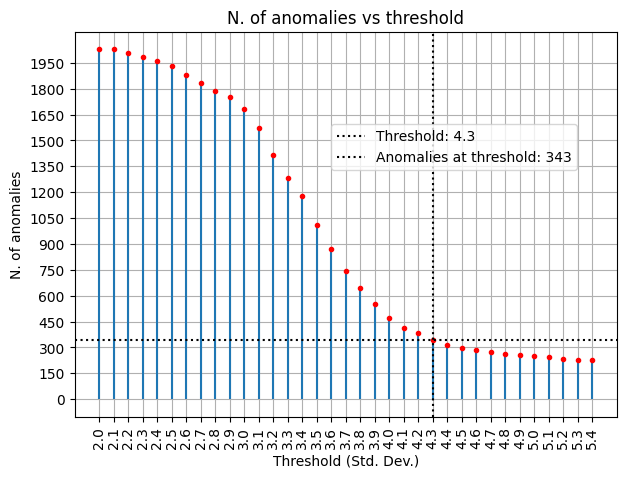

In [21]:
chosen_std = 4.3
std_idx = np.where(np.isclose(kmedoids_std_range, chosen_std))[0][0]

kmedoids_anomalies_thresh_fig = plt.figure(figsize=(7, 5))
plt.vlines(kmedoids_std_range, ymax=anomalies, ymin=0)
plt.plot(kmedoids_std_range, anomalies, 'r.')
plt.xlabel("Threshold (Std. Dev.)")
plt.ylabel("N. of anomalies")
plt.axvline(x=chosen_std, linestyle='dotted', color='k', label=f'Threshold: {chosen_std}')
plt.axhline(y=anomalies[std_idx], linestyle='dotted', color='k', 
            label=f'Anomalies at threshold: {anomalies[std_idx]}')
plt.title("N. of anomalies vs threshold")
plt.xticks(kmedoids_std_range, rotation=90)
plt.yticks(range(0, max(anomalies), 150))
plt.legend(loc='center', bbox_to_anchor=(0.7, 0.7))
plt.grid(True)
plt.show()
#kmedoids_anomalies_thresh_fig.savefig('images/kmedoids_anomalies_thresh_fig.png', dpi=300)

### Clustering visualization using FAMD 

In [22]:
# Select the anomalies with the chosen threshold
threshold = chosen_std
thresholds = cluster_means + threshold * cluster_stds
kmedoid_prob = distances_to_medoids / thresholds[cluster_labels]
kmedoid_prob[kmedoid_prob > 1] = 1
print(f'Total number of anomalies with threshold at {chosen_std} std deviations: {sum(kmedoid_prob.round())}')

Total number of anomalies with threshold at 4.3 std deviations: 343.0


In [23]:
prob_labels_kmedoids = kmedoid_prob.round().astype(str)
prob_labels_kmedoids[prob_labels_kmedoids == '1.0'] = 'Anomaly'
prob_labels_kmedoids[prob_labels_kmedoids == '0.0'] = 'Data'

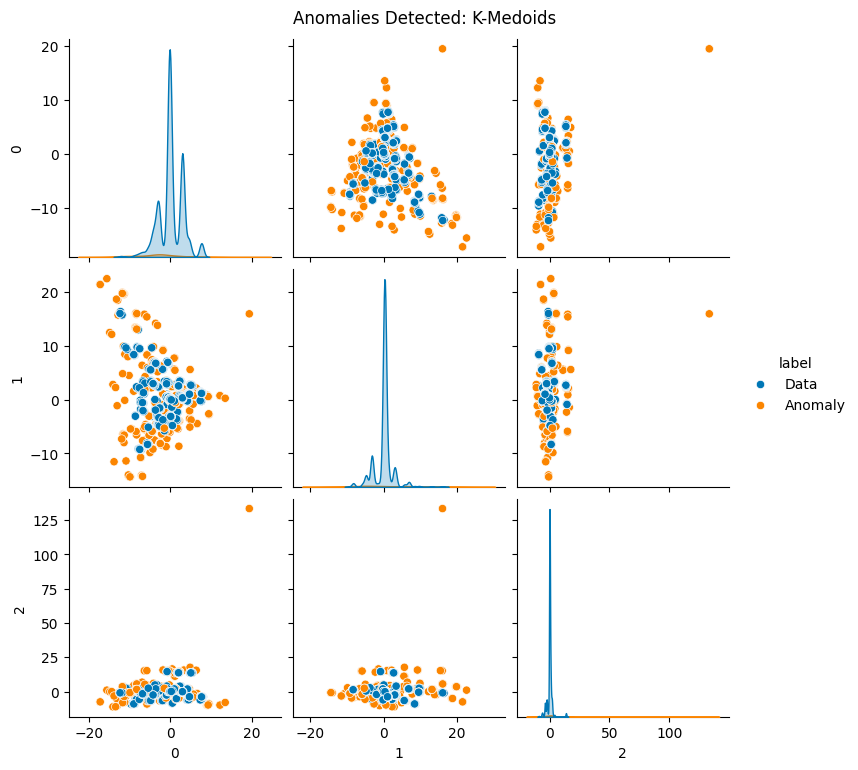

In [28]:
famd_kmedoids_fig = plot_all_components(famd_coords, prob_labels_kmedoids,
                                                    title='Anomalies Detected: K-Medoids')
#famd_kmedoids_fig.savefig('images/famd_kmedoids.png', dpi=300)

## K-Prototype

### Determine the optimal number of clusters 

In [29]:
from kmodes.kprototypes import KPrototypes
cat_col_idxs = [data_std.columns.get_loc(col_name) for col_name in categorical_columns.values]

In [30]:
iterations=13
sse_array_kproto = []
for i in range(2, iterations, 1):
    # Fit the kmedoids for i number of cluster
    kprototype = kproto = KPrototypes(n_clusters=i, init='Cao', n_jobs = -1, verbose=0, random_state=42)
    kprototype.fit(data_std, categorical=cat_col_idxs)

    # Final SSE is the attribute kmedoids.inertia_
    print(f'{i} Clusters: final SSE is {kprototype.cost_:.0f}')
    sse_array_kproto.append(kprototype.cost_)

categorical_columns

2 Clusters: final SSE is 38184
3 Clusters: final SSE is 32858
4 Clusters: final SSE is 28537
5 Clusters: final SSE is 25618
6 Clusters: final SSE is 23151
7 Clusters: final SSE is 21366
8 Clusters: final SSE is 19319
9 Clusters: final SSE is 18287
10 Clusters: final SSE is 17512
11 Clusters: final SSE is 16876
12 Clusters: final SSE is 16195


Index(['Dim_1=0', 'Dim_2=0', 'Dim_3=0', 'Dim_4=0', 'Dim_5=0', 'Dim_6=0',
       'Dim_7=0', 'Dim_8=0', 'Dim_9=0', 'Dim_10=0', 'Dim_11=0', 'Dim_12=0',
       'Dim_13=0', 'Dim_14=0', 'Dim_15=0'],
      dtype='object')

Optimal number of clusters: 4.000


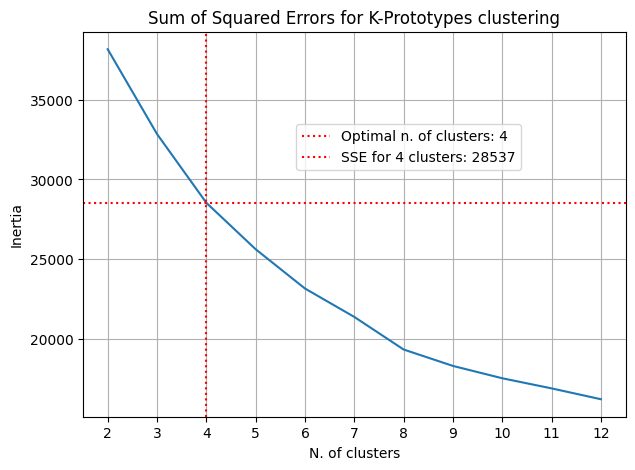

In [31]:
from kneed import KneeLocator

# Get the knee
kneedle = KneeLocator(np.arange(len(sse_array_kproto)), sse_array_kproto, S=1, curve="convex", direction="decreasing")
optimal_clusters = kneedle.knee
optimal_sse = sse_array_kproto[optimal_clusters - 2]
print(f'Optimal number of clusters: {optimal_clusters:.3f}')

iterations = 13

sse_kprotos_fig = plt.figure(figsize=(7, 5))
plt.plot(range(2, iterations, 1), sse_array_kproto)
plt.xticks(range(2, iterations, 1))
plt.title('Sum of Squared Errors for K-Prototypes clustering')
plt.ylabel("Inertia")
plt.xlabel("N. of clusters")
plt.axvline(x=optimal_clusters, color='r', linestyle='dotted', label=f'Optimal n. of clusters: {optimal_clusters}')
plt.axhline(y=optimal_sse, color='r', linestyle='dotted', label=f'SSE for {optimal_clusters} clusters: {optimal_sse:.0f}')
plt.grid()
plt.legend(loc='center', bbox_to_anchor=(0.6, 0.7))
plt.show()
#sse_kprotos_fig.savefig('images/sse_kprotos.png', dpi=300)

**Fit K-Prototypes with the optimal number of clusters: 4**

Here we get the fit to get the labels

In [34]:
from yellowbrick.cluster import KElbowVisualizer
import sys
import warnings
from tqdm.auto import tqdm

# Redirect warnings to a file
warnings.filterwarnings('always')
sys.stderr = open('warnings.txt', 'w')

kprototype = KPrototypes(n_clusters=4, n_jobs = -1, n_init=1, verbose=0, random_state=42)
kprotos_labels = kprototype.fit_predict(data_std, categorical=cat_col_idxs)

c:\Users\Andrea\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Compute mean distance to prototypes of each cluster

In [35]:
def compute_distance(point, prototype, cat_col_idxs, gamma=0.5):
    """
    Compute the distance between a data point and a prototype.

    Parameters:
    - point (list): The data point for which to compute the distance.
    - prototype (list): The prototype to compare the data point with.
    - cat_col_idxs (list): The indices of the categorical columns in the data.

    Returns:
    - distance (float): The distance between the data point and the prototype.
    """

    # Separate numeric and categorical data
    num_idxs = [i for i in range(len(point)) if i not in cat_col_idxs]
    cat_idxs = cat_col_idxs

    # The prototypes of kprototypes are ordered as 
    # [numerical_prototype, categorical_prototype]
    # differently from the data
    nr_numerical_features = len(point)-len(cat_col_idxs)
    num_idxs_proto = range(0, nr_numerical_features)
    cat_idxs_proto = range(nr_numerical_features, len(point))
    
    # Extract numeric and categorical parts
    num_point = np.array([point[i] for i in num_idxs], dtype=float)
    num_prototype = np.array([prototype[i] for i in num_idxs_proto], dtype=float)
    cat_point = np.array([point[i] for i in cat_idxs], dtype=object)
    cat_prototype = np.array([prototype[i] for i in cat_idxs_proto], dtype=object)
    
    # Compute distances
    num_distance = np.sum((num_point - num_prototype) ** 2)
    cat_distance = np.sum(cat_point != cat_prototype) * gamma
    
    return num_distance + cat_distance

# Initialize an empty list to store the distances from each data point to its corresponding prototype
distances_to_protos = []

gamma = kprototype.gamma
# Iterate over each data point in the standardized data
for i, point in data_std.iterrows():
    # Get the cluster label of the current data point
    cluster = kprotos_labels[i]
    # Get the prototype of the cluster to which the current data point belongs
    prototype = kprototype.cluster_centroids_[cluster]
    # Compute the distance between the current data point and its corresponding prototype
    distance = compute_distance(point, prototype, cat_col_idxs, gamma=gamma)
    # Append the computed distance to the list of distances
    distances_to_protos.append(distance)

# Convert the list of distances to a numpy array for easier manipulation
distances_to_protos = np.array(distances_to_protos)

# Compute the mean distance of the data points to their corresponding prototypes for each cluster
cluster_means_kprotos = np.array([np.mean(distances_to_protos[kprotos_labels == cluster_id]) for cluster_id in np.unique(kprotos_labels)])

# Compute the standard deviation of the distances of the data points to their corresponding prototypes for each cluster
cluster_stds_kprotos = np.array([np.std(distances_to_protos[kprotos_labels == cluster_id]) for cluster_id in np.unique(kprotos_labels)])

### Identify anomalies and compute probabilities 

In [36]:
anomalies_kprotos = []

kprotos_std_range = arange(2, 7, 0.1)

for threshold in kprotos_std_range:
    '''
        Here we compute the probability of being an anomaly.
        Points at a distance from their medoid greater than 
        the threshold are defined as anomalies.
    '''
    thresholds = cluster_means_kprotos + threshold * cluster_stds_kprotos

    # Calculate the probability of being an anomaly
    # Divide each distance by the respective threshold for the corresponding cluster
    anomaly_probabilities = distances_to_protos / thresholds[kprotos_labels]
    
    # Cap the probabilities at 1
    anomaly_probabilities[anomaly_probabilities > 1] = 1
    anomalies_kprotos.append(int(sum(anomaly_probabilities.round())))

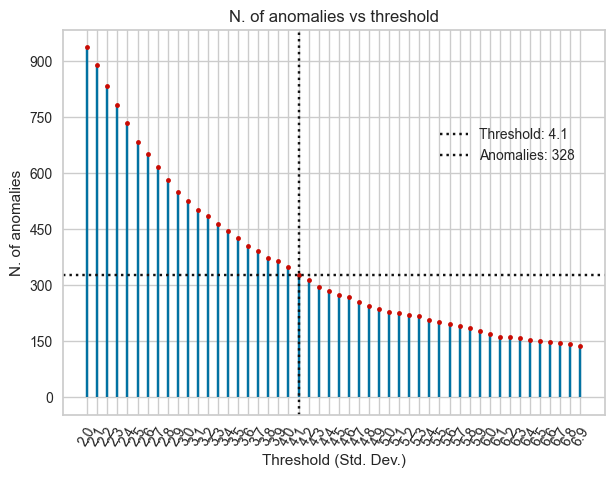

In [38]:
chosen_std = 4.1
std_idx = np.where(np.isclose(kprotos_std_range, chosen_std))[0][0]

kprotos_anomalies_thresh_fig = plt.figure(figsize=(7, 5))
plt.vlines(kprotos_std_range, ymax=anomalies_kprotos, ymin=0)
plt.plot(kprotos_std_range, anomalies_kprotos, 'r.')
plt.xlabel("Threshold (Std. Dev.)")
plt.ylabel("N. of anomalies")
plt.axvline(x=chosen_std, linestyle='dotted', color='k', label=f'Threshold: {chosen_std}')
plt.axhline(y=anomalies_kprotos[std_idx], linestyle='dotted', color='k', label=f'Anomalies: {anomalies_kprotos[std_idx]}')
plt.title("N. of anomalies vs threshold")
plt.xticks(kprotos_std_range, rotation=60)
plt.yticks(range(0, max(anomalies_kprotos), 150))
plt.legend(loc='center', bbox_to_anchor=(0.82, 0.7))
plt.grid(True)
plt.show()
#kprotos_anomalies_thresh_fig.savefig('images/kprotos_anomalies_thresh_fig.png', dpi=300)

### Clustering visualization using FAMD

In [39]:
threshold = chosen_std
thresholds = cluster_means_kprotos + threshold * cluster_stds_kprotos
kprotos_prob = distances_to_protos / thresholds[kprotos_labels]
kprotos_prob[kprotos_prob > 1] = 1
print(f'Total number of anomalies with threshold at {chosen_std} std deviations: {sum(kprotos_prob.round())}')

prob_labels_kprotos = kprotos_prob.round().astype(str)
prob_labels_kprotos[prob_labels_kprotos == '1.0'] = 'Anomaly'
prob_labels_kprotos[prob_labels_kprotos == '0.0'] = 'Data'

Total number of anomalies with threshold at 4.1 std deviations: 328.0


In [40]:
print(sum(prob_labels_kprotos == 'Anomaly'))

328


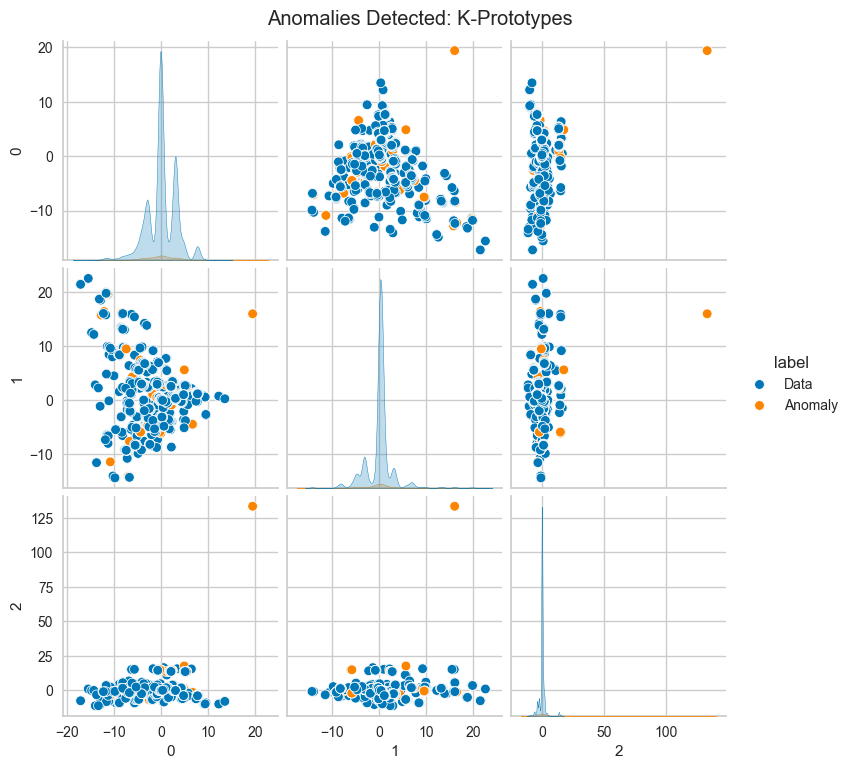

In [41]:
famd_kprotos_fig = plot_all_components(famd_coords, prob_labels_kprotos,
                                                    title='Anomalies Detected: K-Prototypes')
#famd_kprotos_fig.savefig('images/famd_kprotos_fig.png', dpi=300)

# Density Based Clustering

## DBSCAN 

### Determining a starting value for Epsilon using the Elbow method

In [42]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

'''
    We choose number of nearest neighbours equal to 2 times the number of features.
        Sander, Jörg, Martin Ester, Hans-Peter Kriegel, and Xiaowei Xu. 1998. 
        “Density-Based Clustering in Spatial Databases: The Algorithm GDBSCAN and Its Applications.” 
        Data Mining and Knowledge Discovery 2: 169–94.
'''

k = 42  # Number of nearest neighbors

# Use precomputed metric to use Gower distance matrix
nn = NearestNeighbors(n_neighbors=k, metric='precomputed')

# Fit the model using the Gower distance matrix
nn.fit(gower_dist)

# Find the k-nearest neighbors for each sample in the distance matrix
distances, indices = nn.kneighbors(gower_dist)
sorted_distances = np.sort(distances[:, k-1], axis=0)

Optimal EPS values: 0.023


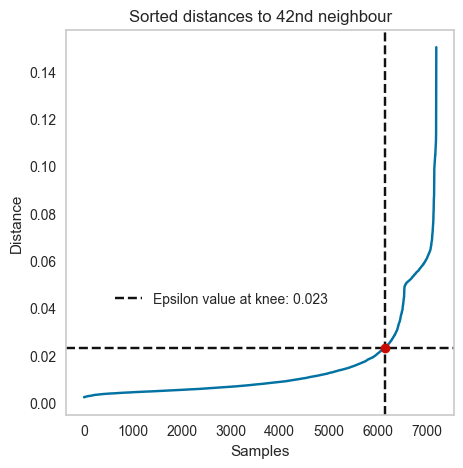

In [43]:
import matplotlib.pyplot as plt
from kneed import KneeLocator

fig_dbscan_eps = plt.figure(figsize=(5,5))
plt.plot(sorted_distances)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title(f'Sorted distances to {k}nd neighbour')
plt.grid()

kneedle = KneeLocator(np.arange(len(sorted_distances)), sorted_distances, S=4.5, curve="convex", direction="increasing")
optimal_k = kneedle.knee
optimal_k_y = kneedle.knee_y
print(f'Optimal EPS values: {optimal_k_y:.3f}')

# Add a vertical line to indicate the chosen eps
plt.figure(fig_dbscan_eps)
plt.axvline(x=optimal_k, color='k', linestyle='--', label=f'Epsilon value at knee: {optimal_k_y:.3f}')
plt.axhline(y=optimal_k_y, color='k', linestyle='--')
plt.plot((optimal_k), (optimal_k_y), 'o', color='r')
plt.legend(loc='center', bbox_to_anchor=(0.4, 0.3))
plt.show()

fig_dbscan_eps.savefig('dbscan_epsilon_knee.png', dpi=300)

### Computing the probability of an element of being an anomaly 

DBSCAN itself does not directly provide probabilities for each point being an anomaly. However, we estimate the probability of a point being an anomaly by considering the density of its neighborhood.

In [44]:
from sklearn.cluster import DBSCAN
import numpy as np
from tqdm.auto import tqdm
def dbscan_outlier_probability(data, eps, min_samples=42):
    # Initialize DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    
    # Fit DBSCAN to the distance matrix
    dbscan.fit(data)
    
    # Get the labels assigned by DBSCAN
    labels = dbscan.labels_
    
    # Initialize probabilities array
    anomalies_probabilities = np.zeros(data.shape[0])
    
    # Compute densities and mean distances
    densities = np.zeros(data.shape[0])
    mean_distances = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        # Find neighbors within eps distance
        neighbors = np.where(data[i] <= eps)[0]
        
        # Compute density as the number of neighbors
        densities[i] = len(neighbors)
        
        # Compute mean distance to neighbors
        mean_distances[i] = np.mean(data[i, neighbors]) if neighbors.size > 0 else np.inf
    
    # Compute the overall statistics for densities and mean distances
    max_density = np.max(densities)
    max_mean_distance = np.max(mean_distances)
    
    # Assign outlier probabilities
    for i in range(data.shape[0]):
        if labels[i] == -1:
            # DBSCAN outliers get a high probability
            anomalies_probabilities[i] = 1
        else:
            # Calculate a combined outlier score
            density_score = 1 - (densities[i] / max_density)
            distance_score = mean_distances[i] / max_mean_distance
            anomalies_probabilities[i] = (density_score + distance_score) / 2
    
    return anomalies_probabilities

min_pts = 42

eps_values = np.arange(0.1, 0.3, 0.01)

n_anomalies = []
for eps in tqdm(eps_values):
    anomalies_probs = dbscan_outlier_probability(gower_dist, eps, min_pts)

    # Sum of probabilities to see the overall anomalies detection
    total_anomalies = np.sum(anomalies_probs.round())
    n_anomalies.append(total_anomalies)


In [45]:
print(n_anomalies)

[2828.0, 2498.0, 1852.0, 1247.0, 1029.0, 731.0, 517.0, 362.0, 238.0, 156.0, 108.0, 72.0, 50.0, 34.0, 29.0, 24.0, 11.0, 4.0, 3.0, 3.0]


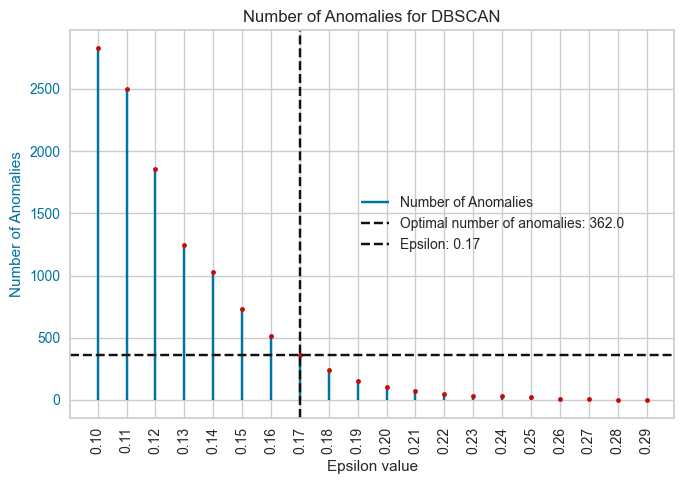

In [47]:
# Plot the number of anomalies
fig_anomalies_dbscan, ax1 = plt.subplots(figsize=(7, 5))

threshold = 0.17
threshold_idx = np.where(np.isclose(eps_values, threshold))[0][0]

# Use vlines for the number of anomalies
ax1.vlines(x=eps_values, ymin=0, ymax=n_anomalies, color='b', label='Number of Anomalies')
ax1.plot(eps_values, n_anomalies, 'r.')
ax1.set_xlabel('Epsilon value')
ax1.set_ylabel('Number of Anomalies', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axhline(y=n_anomalies[threshold_idx], color='k', linestyle='--', 
            label=f'Optimal number of anomalies: {n_anomalies[threshold_idx]}')
ax1.axvline(x=threshold, color='k', linestyle='--', 
            label=f'Epsilon: {threshold:.2f}')
ax1.set_xticks(eps_values)
ax1.set_xticklabels([f'{x:.2f}' for x in eps_values], rotation=90)
ax1.grid(True)
ax1.legend(loc='center', bbox_to_anchor=(0.7, 0.5))

plt.title('Number of Anomalies for DBSCAN')
fig_anomalies_dbscan.tight_layout()
plt.show()
#fig_anomalies_dbscan.savefig('images/anomalies_dbscan.png', dpi=300)

### Clustering visualization using FAMD 

In [48]:
dbscan_prob = dbscan_outlier_probability(gower_dist, threshold, min_samples=42)

In [49]:
dbscan_prob = dbscan_prob.round()
print(f'Found a total of {sum(dbscan_prob == 1.0)} anomalies with threshold {threshold}')

Found a total of 362 anomalies with threshold 0.17


In [50]:
dbscan_final_labels = dbscan_prob.astype('str')
dbscan_final_labels[dbscan_final_labels == '1.0'] = 'Anomaly'
dbscan_final_labels[dbscan_final_labels != 'Anomaly'] = 'Data'

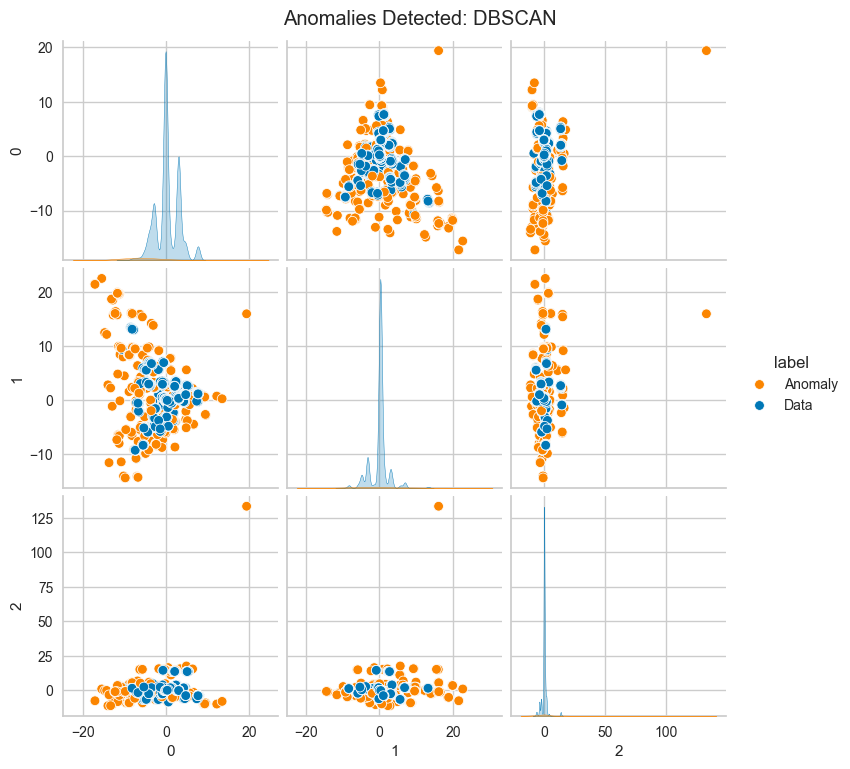

In [51]:
famd_dbscan_fig = plot_all_components(famd_coords, dbscan_final_labels,
                                                    title='Anomalies Detected: DBSCAN')
#famd_dbscan_fig.savefig('images/famd_dbscan.png', dpi=300)

## Local Outlier Factor

In [52]:
from sklearn.neighbors import LocalOutlierFactor

In [53]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.2, metric='precomputed', n_jobs=-1)
y_pred = clf.fit_predict(gower_dist)
X_scores = clf.negative_outlier_factor_

In [54]:
scores_norm = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

### Identify anomalies 

In [55]:
n_anomalies_lof = []
lof_threshold_range = np.arange(0.05, 1, 0.05)
for threshold in lof_threshold_range:
    n_anomalies_lof.append(len(scores_norm[scores_norm > threshold]))

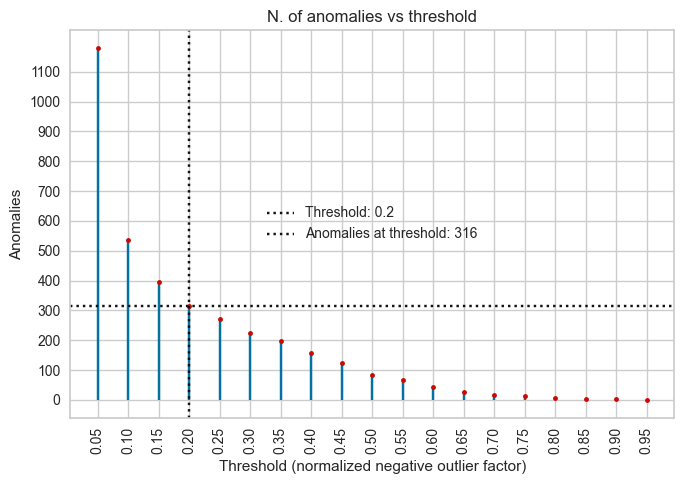

In [57]:
threshold = 0.2

anomalies_lof_fig = plt.figure(figsize=(7, 5))
plt.title("N. of anomalies vs threshold")
plt.vlines(lof_threshold_range, ymin=0, ymax=n_anomalies_lof)
plt.xticks(lof_threshold_range, rotation=90)
plt.plot(lof_threshold_range, n_anomalies_lof, 'r.')
plt.xlabel("Threshold (normalized negative outlier factor)")
plt.ylabel("Anomalies")
plt.axvline(x=threshold, linestyle='dotted', color='k', label=f'Threshold: {threshold}')
plt.axhline(y=n_anomalies_lof[3], linestyle='dotted', color='k', 
            label=f'Anomalies at threshold: {n_anomalies_lof[3]}')
plt.legend()
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5))
plt.yticks(range(0, 1200, 100))
anomalies_lof_fig.tight_layout()
plt.show()
#anomalies_lof_fig.savefig('images/anomalies_lof.png', dpi=300)

### Clustering visualization using FAMD

In [58]:
lof_prob = scores_norm.copy()
lof_prob[lof_prob > threshold] = 1.0
lof_prob[lof_prob <= threshold] = 0.0

In [59]:
sum(lof_prob)

316.0

In [60]:
lof_prob_labels = lof_prob.astype('str')
lof_prob_labels[lof_prob_labels == '1.0'] = 'Anomaly'
lof_prob_labels[lof_prob_labels != 'Anomaly'] = 'Data'

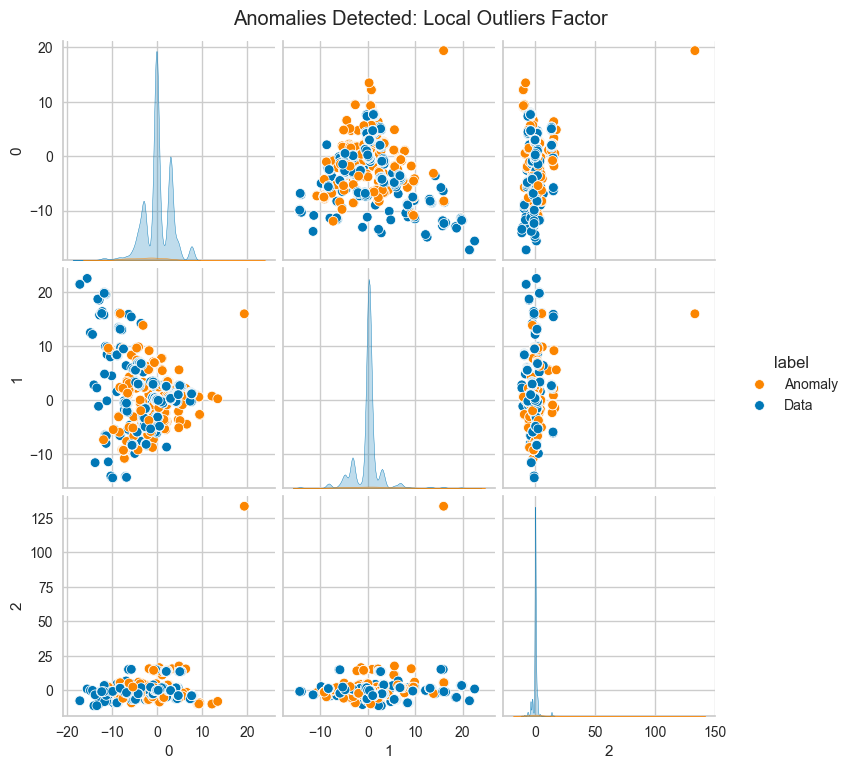

In [61]:
plot_all_components(famd_coords, lof_prob_labels, title='Anomalies Detected: Local Outliers Factor')

### Clustering visualization using FAMD

In this visualization, each point greater than the threshold, that is, those with an higher probabilities to be anomalous, are marked with a circle which size is proportional to the probability of that element to be anomalous. We choose not to put this visualization in the report since we think it's a little more confusing than simply mark the anomalous points with a different color with respect to the normal data point, but left it in the notebook since it can be somewhat informative

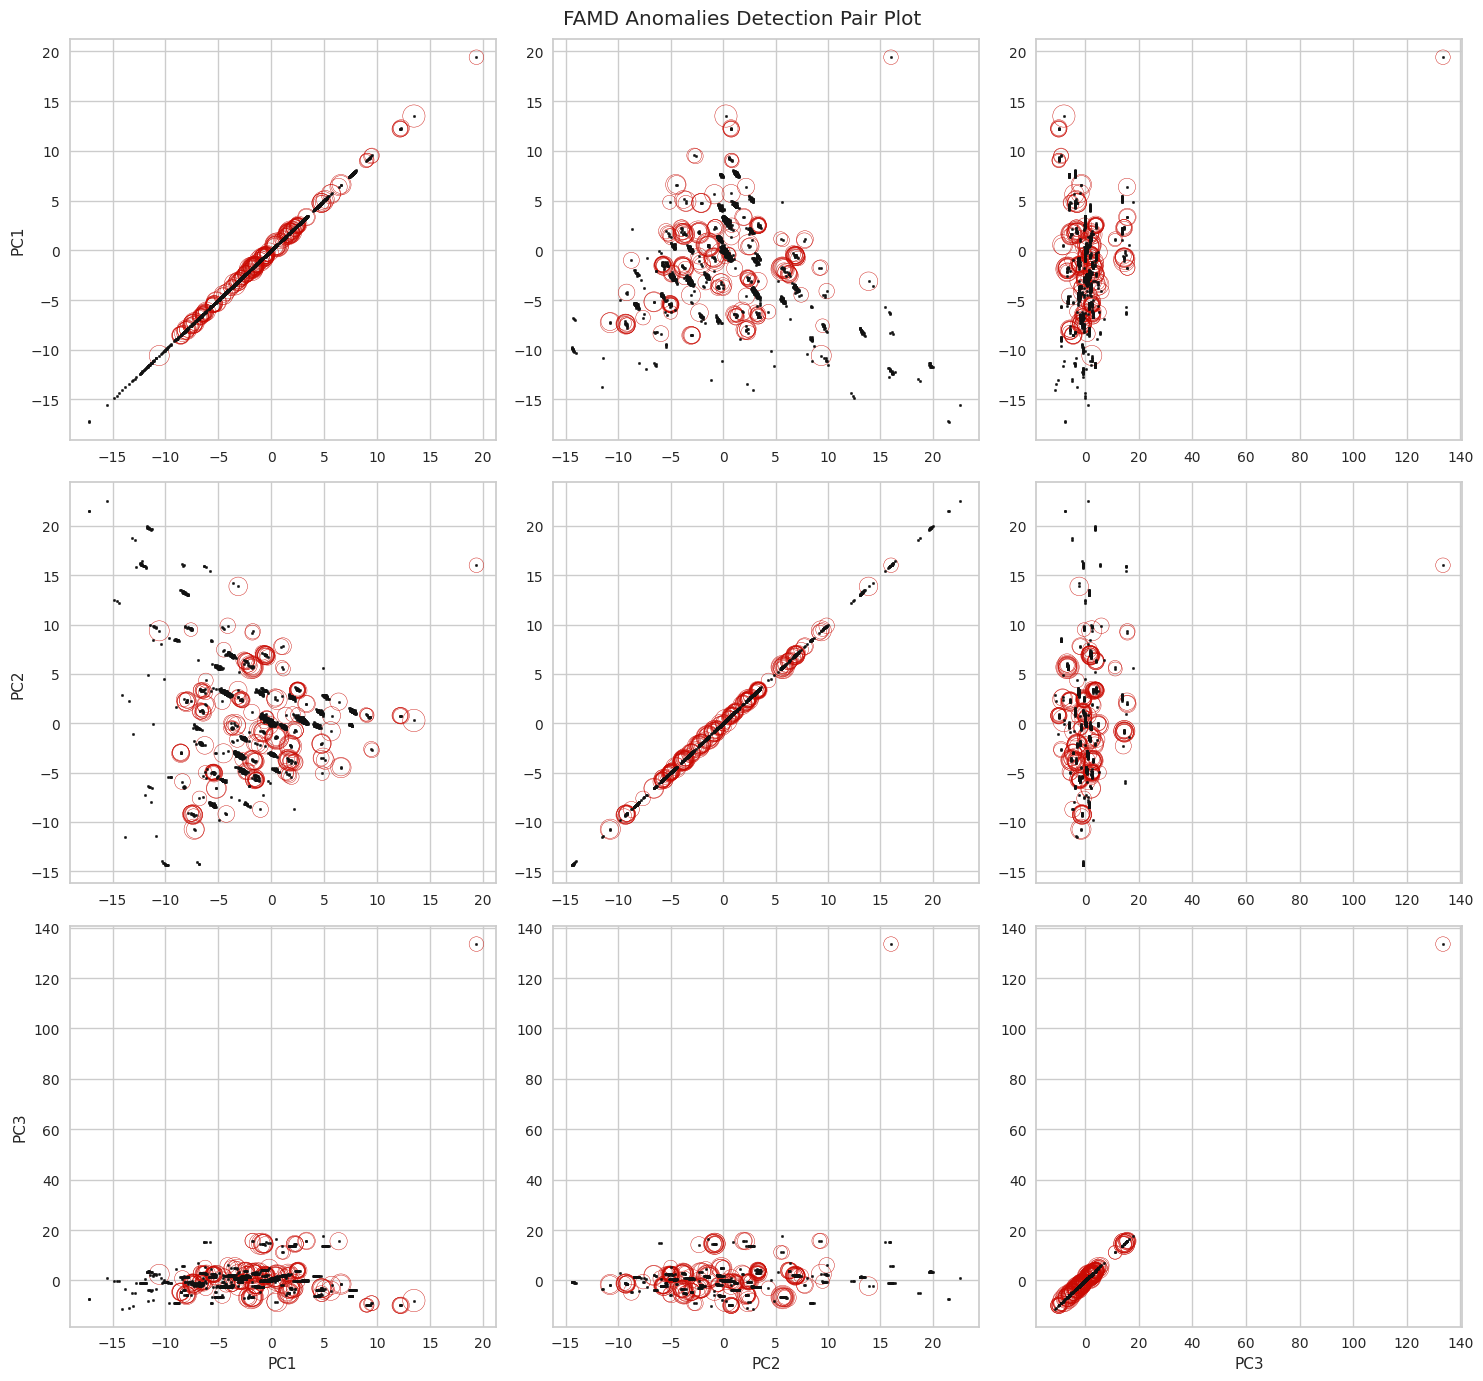

In [362]:
from itertools import product
num_components = 3
# Use the first num_components components
num_components = min(famd_coords.shape[1], num_components)
components_to_plot = famd_coords.iloc[:, :num_components]

# Generate pair plots for the selected components
fig, axes = plt.subplots(num_components, num_components, figsize=(15, 15))
fig.suptitle("FAMD Anomalies Detection Pair Plot", y=0.92)

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
radius = np.array(list(map(lambda x: 0 if x < 0.3 else x, radius)))

for (i, j) in product(range(num_components), repeat=2):
    ax = axes[i, j]
    ax.scatter(
        components_to_plot.iloc[:, j], 
        components_to_plot.iloc[:, i],
        s=300 * radius,
        edgecolors="r",
        facecolors="none",
        label="Outlier scores",
    )
    ax.scatter(components_to_plot.iloc[:, j], components_to_plot.iloc[:, i], color="k", s=3.0, label="Data points")
    if i == num_components - 1:
        ax.set_xlabel(f'PC{j+1}')
    if j == 0:
        ax.set_ylabel(f'PC{i+1}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Cluster Evaluation 

## Adjusted Rand Index

The Adjusted Rand Index (ARI) is a widely used metric for evaluating the performance of clustering algorithms. It measures the similarity between two clustering assignments, taking into account the agreement between the clusters as well as the agreement between the non-clustered points.

The Rand Index is a measure of similarity between two data clusterings, ranging from 0 (dissimilar) to 1 (identical). However, the Rand Index has a tendency to produce high values for random clusterings, especially when the number of clusters is large. To address this issue, the Adjusted Rand Index (ARI) was introduced, which adjusts the Rand Index score to account for the expected similarity between two random clusterings.

The $ARI$ is defined as:

$$ARI = \frac{RI - E(RI)}{max(RI) - E(RI)}$$

Where:
- $RI$ is the Rand Index
- $E(RI)$ is the expected Rand Index for random clusterings
- $max(RI)$ is the maximum possible value of the Rand Index

The ARI ranges from -1 to 1, with values closer to 1 indicating a better agreement between the two clusterings. A value of 1 indicates perfect agreement, while a value of 0 indicates that the clustering assignments are no better than random.

In the context of our analysis, we will use the ARI to evaluate the performance between different clustering algorithms applied to the same dataset. This will help us assess the effectiveness of each algorithm in accurately grouping the data points into meaningful clusters.

In [363]:
probs = {
    'HC_average' : hc_average_prob.round(),
    'HC_complete' : hc_complete_prob.round(),
    'DBSCAN' : dbscan_prob.round(),
    'K-Medoids' : kmedoid_prob.round(),
    'K-Prototypes' : kprotos_prob.round(),
    'LOF' : lof_prob
}

In [364]:
probs = pd.DataFrame(probs)
probs

,HC_average,HC_complete,DBSCAN,K-Medoids,K-Prototypes,LOF
0,1.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7195,0.0,0.0,0.0,0.0,0.0,0.0
7196,0.0,0.0,0.0,0.0,0.0,0.0
7197,0.0,0.0,0.0,0.0,0.0,0.0
7198,0.0,0.0,0.0,0.0,0.0,0.0


In [365]:
probs.columns

Index(['HC_average', 'HC_complete', 'DBSCAN', 'K-Medoids', 'K-Prototypes',
       'LOF'],
      dtype='object')

In [366]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

n_algs = len(probs.columns)

# Initialize an empty matrix
ari_matrix = np.zeros((n_algs, n_algs))

# Compute ARI for each pair of clustering results
for i in range(n_algs):
    for j in range(n_algs):
        ari_matrix[i, j] = adjusted_rand_score(probs.iloc[:,i], probs.iloc[:,j])

print("ARI Matrix:")
print(ari_matrix)

ARI Matrix:
[[1.         0.69903662 0.7350104  0.53815109 0.05372812 0.67409165]
 [0.69903662 1.         0.53581508 0.41022502 0.04300247 0.58048537]
 [0.7350104  0.53581508 1.         0.57109427 0.06487767 0.46778395]
 [0.53815109 0.41022502 0.57109427 1.         0.11545249 0.31862076]
 [0.05372812 0.04300247 0.06487767 0.11545249 1.         0.04919649]
 [0.67409165 0.58048537 0.46778395 0.31862076 0.04919649 1.        ]]


In [367]:
pd.DataFrame(ari_matrix, columns=probs.columns, index=probs.columns)

,HC_average,HC_complete,DBSCAN,K-Medoids,K-Prototypes,LOF
HC_average,1.000000,0.699037,0.735010,0.538151,0.053728,0.674092
HC_complete,0.699037,1.000000,0.535815,0.410225,0.043002,0.580485
DBSCAN,0.735010,0.535815,1.000000,0.571094,0.064878,0.467784
K-Medoids,0.538151,0.410225,0.571094,1.000000,0.115452,0.318621
K-Prototypes,0.053728,0.043002,0.064878,0.115452,1.000000,0.049196
LOF,0.674092,0.580485,0.467784,0.318621,0.049196,1.000000


## Comparing the number of anomalies

In [368]:
pd.DataFrame(probs.sum(axis=0),  columns=["# of Anomalies"])

,# of Anomalies
HC_average,428.0
HC_complete,446.0
DBSCAN,362.0
K-Medoids,343.0
K-Prototypes,328.0
LOF,316.0


## Computing the final anomaly probability score

To compute the final anomaly score we opted for computing the average probability of each sample across their probabilities with the following algorithms:

- Hierarchical Clustering with Average linkage
- Hierarchical Clustering with Complete linkage
- DBSCAN

In [403]:
final_prob = (hc_average_prob + hc_complete_prob + dbscan_prob) / 3
final_prob_rounded = final_prob.round()
sum(final_prob_rounded)

402.0

In [405]:
final_prob_rounded = final_prob_rounded.astype('str')
final_prob_rounded[final_prob_rounded == '1.0'] = 'Anomaly'
final_prob_rounded[final_prob_rounded != 'Anomaly'] = 'Data'

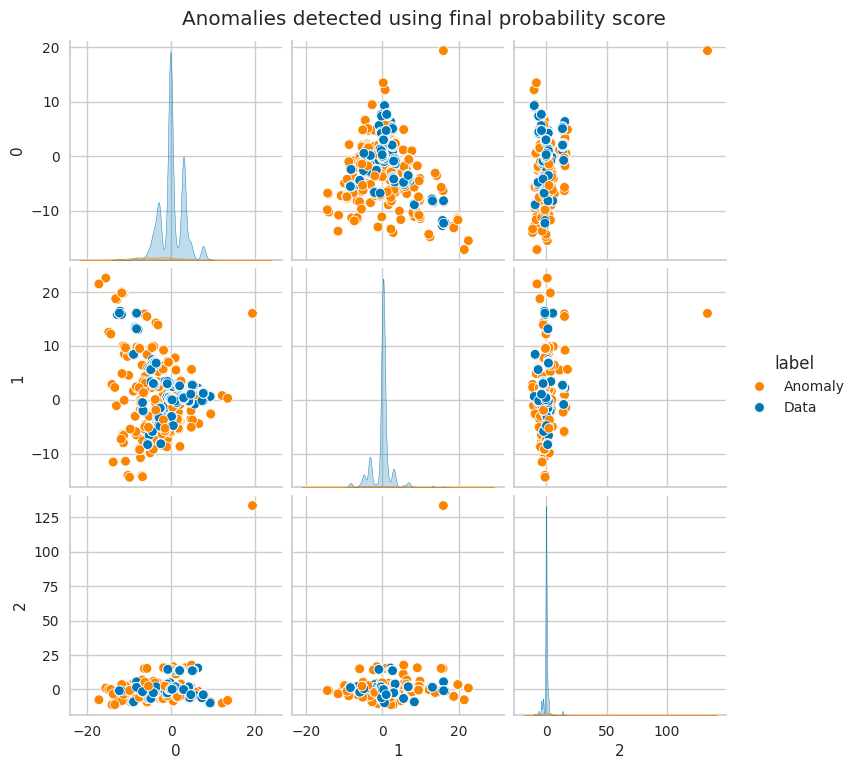

In [407]:
plot_all_components(famd_coords, final_prob_rounded, title='Anomalies detected using final probability score')